# Credit Risk Analysis

### Introduction
This notebook demonstrates a Credit Risk Probability of Default (PD) Model using boosting techniques. The goal is to predict the likelihood of a borrower defaulting on a loan. This model is crucial for financial institutions to manage risk and make informed lending decisions.

### About the Dataset
The dataset contains various features related to the borrower's financial and personal information, such as age, income, home ownership, employment length, and loan details. The target variable is loan_status, which indicates whether the borrower defaulted

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
credit_risk = pd.read_csv("data/credit_risk_dataset.csv")
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
credit_risk_copy = credit_risk.copy()

In [12]:
cr_age_rmvd = credit_risk[credit_risk['person_age']<=70]
cr_age_rmvd.reset_index(drop=True, inplace=True)

In [13]:
cr_age_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [14]:
person_emp_rmvd = cr_age_rmvd[cr_age_rmvd['person_emp_length']<=47]
person_emp_rmvd.reset_index(drop=True, inplace=True)
person_emp_rmvd.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [15]:
person_emp_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,28626.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.040070,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.229507,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [16]:
person_emp_rmvd.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3045
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
cr_data = person_emp_rmvd.copy()

In [18]:
cr_data.fillna({'loan_int_rate':cr_data['loan_int_rate'].median()},inplace=True)

In [19]:
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [20]:
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31671.000000,3.167100e+04,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000,31671.000000
mean,27.717754,6.649231e+04,4.780714,9660.637492,11.035256,0.215497,0.169621,5.804395
std,6.159859,5.277413e+04,4.028718,6334.716643,3.070364,0.411173,0.106275,4.048776
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.936600e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,70.000000,2.039784e+06,38.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [21]:
cr_data.groupby('loan_status').count()['person_age']

loan_status
0    24846
1     6825
Name: person_age, dtype: int64

In [22]:
6825/(6825+24846)

0.21549682675002368

In [23]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [24]:
cr_data.groupby('person_home_ownership').count()['loan_intent']

person_home_ownership
MORTGAGE    13088
OTHER         107
OWN          2410
RENT        16066
Name: loan_intent, dtype: int64

In [25]:
cr_data.groupby('loan_intent').count()['person_home_ownership']

loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5891
PERSONAL             5365
VENTURE              5553
Name: person_home_ownership, dtype: int64

In [26]:
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [27]:
cr_data_copy=cr_data.drop('loan_grade',axis=1)

In [28]:
display(cr_data_copy.shape)
display(cr_data_copy.head())

(31671, 11)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


## Categorical Features Treatment

In [29]:
cr_data_cat_treated = cr_data_copy.copy()

In [30]:
person_home_ownership = pd.get_dummies(cr_data_cat_treated['person_home_ownership'],drop_first=True).astype(int)
loan_intent = pd.get_dummies(cr_data_cat_treated['loan_intent'],drop_first=True).astype(int)
cr_data_cat_treated['cb_person_default_on_file_binary'] = np.where(cr_data_cat_treated['cb_person_default_on_file']=='Y',1,0)
cr_data_cat_treated.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,0


In [31]:
person_home_ownership.head()

,OTHER,OWN,RENT
0,0,1,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,1,0


In [32]:
data_to_scale = cr_data_cat_treated.drop(['person_home_ownership','loan_intent','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary'],axis=1)

In [33]:
data_to_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [34]:
scaler = StandardScaler()

In [35]:
data_to_scale.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [36]:
scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
scaled_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656


In [37]:
scaled_df.shape

(31671, 7)

In [38]:
scaled_data_combined = pd.concat([scaled_df,person_home_ownership,loan_intent],axis=1)
scaled_data_combined['cb_person_default_on_file'] = cr_data_cat_treated['cb_person_default_on_file_binary']
scaled_data_combined['loan_status'] = cr_data_cat_treated['loan_status']
scaled_data_combined.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file,loan_status
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0,1
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0,1
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0,1


In [39]:
scaled_data_combined.groupby('loan_status').count()['EDUCATION']

loan_status
0    24846
1     6825
Name: EDUCATION, dtype: int64

In [40]:
target = scaled_data_combined['loan_status']
features = scaled_data_combined.drop('loan_status',axis=1)
features.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE,cb_person_default_on_file
0,-1.090587,-1.078051,0.054432,-1.367192,0.034115,-0.655113,-0.939656,0,1,0,1,0,0,0,0,0
1,-0.441211,-1.078051,-0.938456,-0.656810,0.597575,3.767461,-0.692664,0,0,0,0,0,1,0,0,0
2,-0.765899,-0.018803,-0.193790,4.000141,1.366226,3.391072,-0.939656,0,0,1,0,0,1,0,0,0
3,-0.603555,-0.229137,0.799097,4.000141,1.053554,3.579267,-0.445671,0,0,1,0,0,1,0,0,1
4,-1.090587,-1.072366,-0.690234,-1.130398,-1.268682,0.756347,-0.939656,0,1,0,0,0,0,0,1,0


## Data Balancing

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE()

In [43]:
balanced_features, balanced_target = smote.fit_resample(features,target)

In [44]:
balanced_target.shape

(49692,)

In [45]:
balanced_target_df = pd.DataFrame({'target':balanced_target})
balanced_target_df.groupby('target').size()

target
0    24846
1    24846
dtype: int64

## Models Training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [47]:
x_train, x_test, y_train, y_test = train_test_split(balanced_features, balanced_target,test_size=0.20,random_state=42)

In [48]:
logit = LogisticRegression()

In [49]:
logit.fit(x_train,y_train)

LogisticRegression()

In [50]:
import pickle

In [51]:
with open('logisticPDmodel.pkl','wb') as file:
    pickle.dump(logit,file)

In [52]:
logit.score(x_train,y_train)

0.7814001459009383

In [53]:
logit_prediction = logit.predict(x_test)

In [54]:
print(classification_report(y_test,logit_prediction))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      4995
           1       0.78      0.78      0.78      4944

    accuracy                           0.78      9939
   macro avg       0.78      0.78      0.78      9939
weighted avg       0.78      0.78      0.78      9939



In [55]:
print(logit.coef_[0])

[-0.05284966  0.07646526 -0.02907466 -0.70133966  0.98768988  1.41849342
  0.00555954 -0.61398524 -2.17165361  0.44976907 -1.19636287 -0.38013049
 -0.50297455 -0.98044826 -1.52706503  0.07865491]


In [56]:
features_imp_logit = pd.DataFrame({'features':balanced_features.columns,'logit_imp':logit.coef_[0]})

## RandomForest

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
with open('RandomForesPDmodel.pkl','wb') as file:
    pickle.dump(rf,file)

In [60]:
rf.score(x_train,y_train)

1.0

In [61]:
rf_prediction = rf.predict(x_test)
rf_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [62]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4995
           1       0.97      0.91      0.94      4944

    accuracy                           0.94      9939
   macro avg       0.94      0.94      0.94      9939
weighted avg       0.94      0.94      0.94      9939



In [63]:
rf.feature_importances_

array([0.06273176, 0.1526905 , 0.0746186 , 0.08529246, 0.20748506,
       0.19805558, 0.06023311, 0.00043656, 0.02079841, 0.04739823,
       0.01535098, 0.01653112, 0.00898851, 0.01296448, 0.017571  ,
       0.01885365])

In [64]:
features_imp_rf = pd.DataFrame({'features':balanced_features.columns,'rf_imp':rf.feature_importances_})

## XgBoost Model

In [65]:
xgb_model = XGBClassifier(tree_method = 'exact')

In [66]:
# model.fit(x,y.values.ravel())
xgb_model.fit(x_train,y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
xgb_model.score(x_train,y_train.values.ravel())

0.9654365708248434

In [69]:
xgb_prediction = xgb_model.predict(x_test)
xgb_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [70]:
print(classification_report(y_test,xgb_prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4995
           1       0.98      0.91      0.95      4944

    accuracy                           0.95      9939
   macro avg       0.95      0.95      0.95      9939
weighted avg       0.95      0.95      0.95      9939



In [84]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'min_child_weight': [1, 5, 10],
    'early_stopping_round': [5, 10, 20]
}

random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', n_iter=10, verbose=1, n_jobs=-1)
random_search.fit(x_train,y_train.values.ravel())

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "early_stopping_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "early_stopping_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "early_stopping_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "early_stopping_round" } are not used.

  bst.update(dtrain,

Best parameters: {'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.5, 'gamma': 0.5, 'early_stopping_round': 5, 'colsample_bytree': 0.8}
Best cross-validation score: 0.9829695544511852


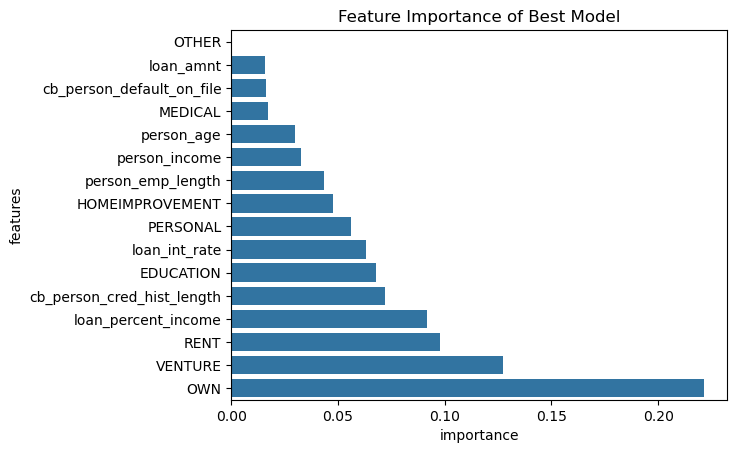

In [88]:
#Now from the best model of random search cv show the best features in a bargraph
best_model = random_search.best_estimator_  
feature_importance = pd.DataFrame({'features':x_train.columns, 'importance':best_model.feature_importances_})
feature_importance.sort_values(by='importance', inplace=True)
sns.barplot(x='importance', y='features', data=feature_importance);
plt.title('Feature Importance of Best Model');
plt.show()
